In [27]:
import pandas as pd


file_path = 'C:/Users/Prachi/Documents/Data Science Masters/Thesis/Klausurdaten.xlsx'
data = pd.read_excel(file_path)


In [28]:
data.head()


,Nummer,Scan-Nr.,Matr.-Nr.,1.1.1,Punkte,1.1.2.a,Punkte.1,1.1.2.b,Punkte.2,1.1.3,...,7.1.1,Punkte.38,7.1.2,Punkte.39,7.1.3,Punkte.40,7.1.4,Punkte.41,7.1.5,Punkte.42
0,1,5276,23081417,4,0,1.0,1,4,"0,5",4,...,"5,6,7",0,2,0,1,2,7,0,2,0
1,2,5276,23208324,4,0,2.0,0,2,0,2,...,2,0,2,0,2,0,2,0,2,0
2,3,5276,23080950,2,0,2.0,0,2,0,2,...,1,2,6,"1,5",7,0,7,0,5,0
3,4,5276,23171914,2,0,2.0,0,2,0,2,...,1,2,1,2,1,2,1,2,5,0
4,5,5276,23093804,6,"1,5",1.0,1,4,0,7,...,1,2,6,"1,5",1,2,5,0,1,2


In [29]:
import seaborn as sns


In [30]:
# Extracting roll numbers and question scores
score_columns = [col for col in data.columns if 'Punkte' in col]
student_score_data = data[['Matr.-Nr.'] + score_columns]

# Get a list of all columns in the 'data' DataFrame
all_columns = data.columns.tolist()

# Remove the columns in 'score_columns' from this list
columns_to_keep_1 = [col for col in all_columns if col not in score_columns]
columns_to_keep = [col for col in columns_to_keep_1 if col != "Nummer" or col != "Scan-Nr."]

# Create a new DataFrame with the remaining columns
student_answer_class_data = data[columns_to_keep]

student_score_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Matr.-Nr.  448 non-null    object 
 1   Punkte     445 non-null    object 
 2   Punkte.1   446 non-null    object 
 3   Punkte.2   446 non-null    object 
 4   Punkte.3   446 non-null    object 
 5   Punkte.4   446 non-null    float64
 6   Punkte.5   446 non-null    object 
 7   Punkte.6   446 non-null    object 
 8   Punkte.7   446 non-null    object 
 9   Punkte.8   446 non-null    object 
 10  Punkte.9   447 non-null    object 
 11  Punkte.10  447 non-null    object 
 12  Punkte.11  446 non-null    object 
 13  Punkte.12  447 non-null    object 
 14  Punkte.13  428 non-null    object 
 15  Punkte.14  430 non-null    object 
 16  Punkte.15  430 non-null    object 
 17  Punkte.16  430 non-null    object 
 18  Punkte.17  447 non-null    float64
 19  Punkte.18  447 non-null    object 
 20  Punkte.19 

In [31]:
student_answer_class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 46 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nummer     448 non-null    int64  
 1   Scan-Nr.   448 non-null    int64  
 2   Matr.-Nr.  448 non-null    object 
 3   1.1.1      447 non-null    object 
 4   1.1.2.a    446 non-null    float64
 5   1.1.2.b    445 non-null    object 
 6   1.1.3      444 non-null    object 
 7   2.1.1      444 non-null    object 
 8   2.1.2      442 non-null    object 
 9   2.1.3      442 non-null    object 
 10  2.1.4      440 non-null    object 
 11  2.1.5      446 non-null    object 
 12  2.2.1      448 non-null    object 
 13  2.2.2      448 non-null    object 
 14  2.2.3      448 non-null    object 
 15  2.2.4      448 non-null    object 
 16  2.3.1      446 non-null    object 
 17  2.3.2      446 non-null    object 
 18  2.3.3      446 non-null    object 
 19  2.3.4      445 non-null    object 
 20  3.1.1     

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


In [33]:

# Data cleaning
# Convert score columns to numeric, handling any non-numeric entries
for col in score_columns:
    student_score_data[col] = pd.to_numeric(student_score_data[col].astype(str).str.replace(',', '.').str.replace(' ', ''), errors='coerce')

# Fill missing values with zero (assuming no score or missing data means zero score)
student_score_data.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
student_score_data_scaled = scaler.fit_transform(student_score_data[score_columns])


C:\Users\Prachi\AppData\Local\Temp\ipykernel_13964\2921546787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_score_data[col] = pd.to_numeric(student_score_data[col].astype(str).str.replace(',', '.').str.replace(' ', ''), errors='coerce')
C:\Users\Prachi\AppData\Local\Temp\ipykernel_13964\2921546787.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_score_data.fillna(0, inplace=True)


In [34]:
# Display the first few rows of the preprocessed data
print(student_score_data.head())


  Matr.-Nr.  Punkte  Punkte.1  Punkte.2  Punkte.3  Punkte.4  Punkte.5  \
0  23081417     0.0       1.0       0.5       0.0       1.0       1.0   
1  23208324     0.0       0.0       0.0       0.0       1.0       1.0   
2  23080950     0.0       0.0       0.0       0.0       1.0       1.0   
3  23171914     0.0       0.0       0.0       0.0       1.0       1.0   
4  23093804     1.5       1.0       0.0       0.0       0.0       0.0   

   Punkte.6  Punkte.7  Punkte.8  ...  Punkte.33  Punkte.34  Punkte.35  \
0       1.0       0.0       1.0  ...        1.0        0.0        0.0   
1       0.0       0.0       0.0  ...        0.0        0.0        0.0   
2       2.0       1.0       1.5  ...        1.0        0.5        0.5   
3       2.0       2.0       1.0  ...        0.0        0.5        0.0   
4       0.0       0.0       0.0  ...        1.0        0.5        0.5   

   Punkte.36  Punkte.37  Punkte.38  Punkte.39  Punkte.40  Punkte.41  Punkte.42  
0        0.0        0.0        0.0       

In [35]:
print(student_score_data_scaled[:5])  # Show first few rows of both original and scaled data

[[-0.38297874  1.05999579  0.67020012 -0.27722394  0.41196213  0.23235384
  -0.69334079 -1.72534518 -0.42825366 -0.64458545 -0.54468407 -0.64989402
  -0.48675223  1.10107077 -0.33912678 -0.71257434 -0.86604575 -2.37943824
  -1.70738838  1.60557072 -0.8054868   0.86215897  0.69752841 -0.48411593
  -0.2133948  -0.79862674  0.8650491  -0.81426676 -0.63480802 -0.79256157
  -0.52232846 -0.33539426  0.09010262  0.38825906 -0.86107997 -0.62843845
  -0.68419586 -0.84088583 -1.51872183 -1.60367217  1.40377661 -0.48810457
  -0.70657237]
 [-0.38297874 -0.80593    -0.25649634 -0.27722394  0.41196213  0.23235384
  -2.1149274  -1.72534518 -2.04730546 -0.64458545 -0.54468407 -0.64989402
  -0.48675223 -0.91231578 -0.86301919 -0.71257434 -0.86604575 -2.37943824
   0.7055769  -0.92716055 -0.8054868  -1.1084901  -1.37195986 -0.48411593
  -0.2133948  -0.79862674 -1.3431674  -0.81426676 -0.63480802 -0.79256157
  -0.52232846 -0.33539426 -1.34422133 -1.01448335 -0.86107997 -0.62843845
  -0.68419586 -0.840885

In [36]:


# Adjusting the data preprocessing to handle non-string columns

# Convert score columns to strings and then to numeric, handling any non-numeric entries
for col in score_columns:
    student_score_data[col] = pd.to_numeric(student_score_data[col].astype(str).str.replace(',', '.').str.replace(' ', ''), errors='coerce')

# Fill missing values with zero (assuming no score or missing data means zero score)
student_score_data.fillna(0, inplace=True)

C:\Users\Prachi\AppData\Local\Temp\ipykernel_13964\1994366823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_score_data[col] = pd.to_numeric(student_score_data[col].astype(str).str.replace(',', '.').str.replace(' ', ''), errors='coerce')
C:\Users\Prachi\AppData\Local\Temp\ipykernel_13964\1994366823.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_score_data.fillna(0, inplace=True)


In [37]:
# Applying K-means clustering

# Normalize the data
scaler = StandardScaler()
student_data_scaled = scaler.fit_transform(student_score_data[score_columns])

# Display the first few rows of the preprocessed data
#print(student_data.head())
#print(student_data_scaled[:5])  # Show first few rows of both original and scaled data

# Elbow Method to find the optimal number of clusters
sum_of_squared_distances = []
K = range(1, 15)  # Trying different numbers of clusters (from 1 to 14)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(student_data_scaled)
    sum_of_squared_distances.append(km.inertia_)


c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

Correlation Matrix:
          0         1         2         3         4         5         6   \
0   1.000000  0.340991  0.321201  0.404121  0.015936  0.029488  0.062634   
1   0.340991  1.000000  0.518906  0.291014  0.125057  0.082020  0.148767   
2   0.321201  0.518906  1.000000  0.343889  0.058680  0.028327  0.122100   
3   0.404121  0.291014  0.343889  1.000000  0.079606  0.038097  0.089288   
4   0.015936  0.125057  0.058680  0.079606  1.000000  0.287530  0.231571   
5   0.029488  0.082020  0.028327  0.038097  0.287530  1.000000  0.133689   
6   0.062634  0.148767  0.122100  0.089288  0.231571  0.133689  1.000000   
7   0.120267  0.165657  0.076782  0.085787  0.134437  0.163283  0.398125   
8   0.045535  0.126894  0.071003 -0.007745  0.130248  0.148677  0.349121   
9   0.160238  0.077293  0.044417  0.116786  0.028036  0.001001  0.070706   
10  0.131809  0.094103  0.092875  0.074930  0.027279 -0.000299  0.074032   
11  0.138007  0.184384  0.145925  0.090665  0.042353  0.089936  0.17

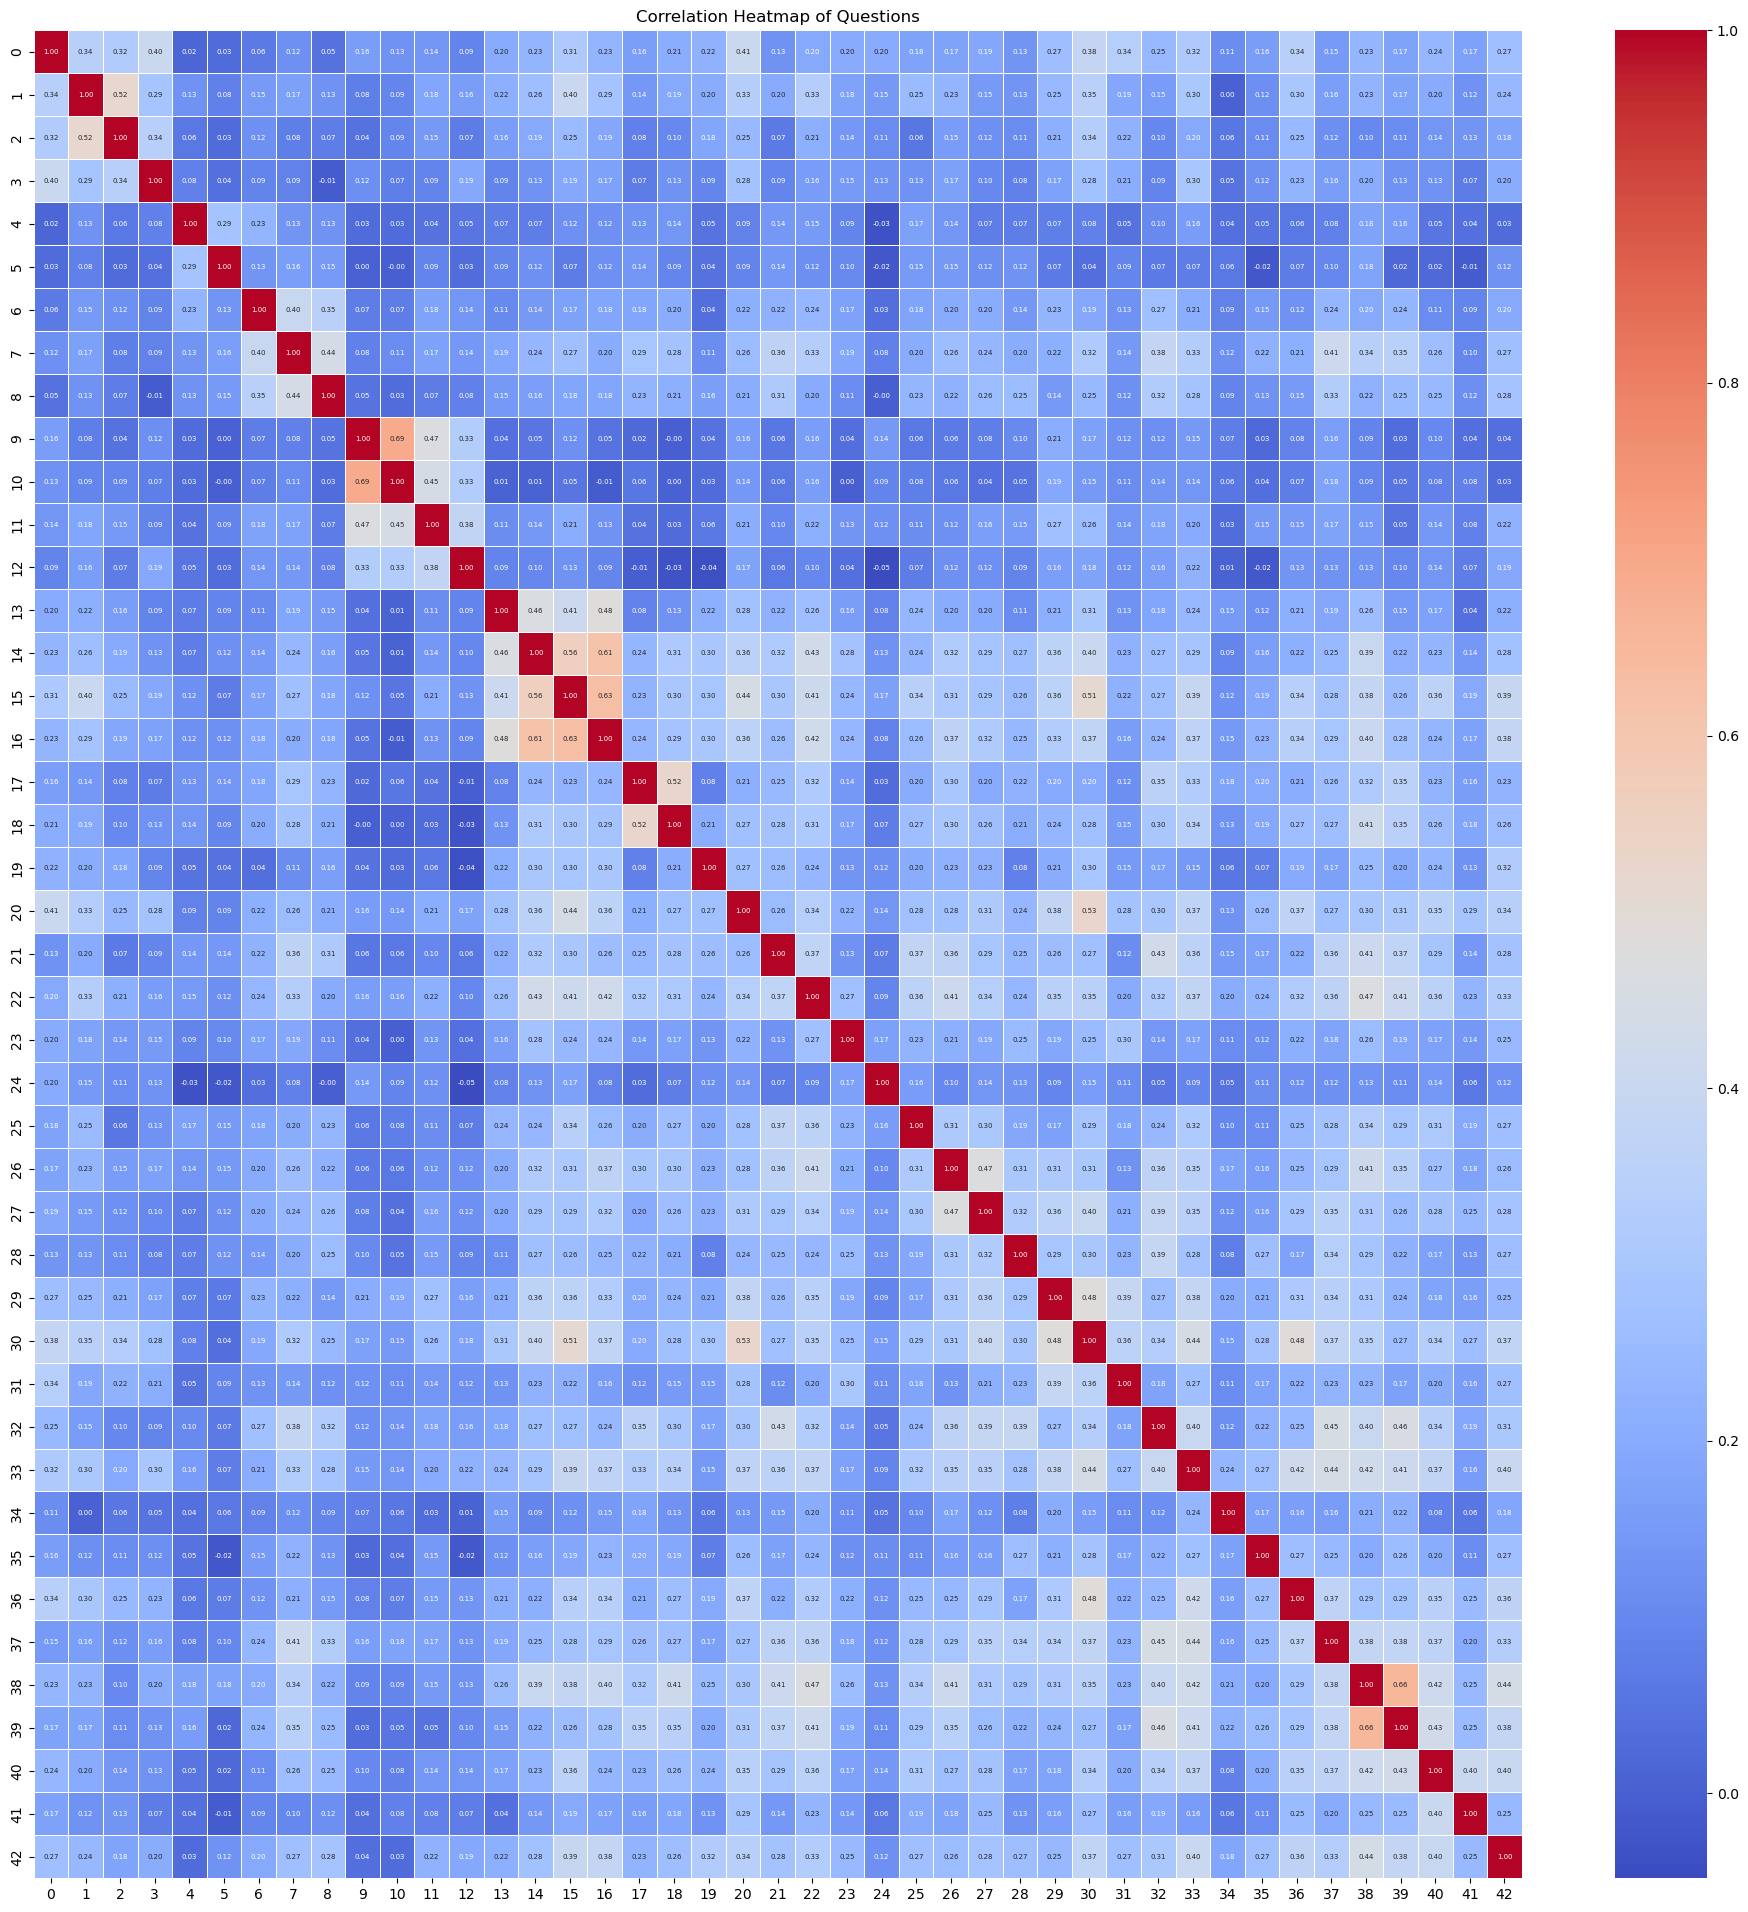

Pairs with correlation > 0.75:
[]


In [38]:
df_student_data_scaled= pd.DataFrame(student_data_scaled)

# Calculate the correlation matrix
correlation_matrix = df_student_data_scaled.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(24, 24))
# Create a colurful heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={'size': 5})
# Create a grayscale heatmap without overlapping annotations
# sns.heatmap(correlation_matrix, cmap='gray', annot=True, fmt='.2f', linewidths=.5, annot_kws={'size': 5})
plt.title('Correlation Heatmap of Questions')
plt.show()


high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        
        if correlation_matrix.iloc[i, j] > 0.75:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)

print("Pairs with correlation > 0.75:")
print(high_correlation_pairs)

In [39]:

# Calculating array 'student_score_per_topic' and 'student_score_per_subtopic'
sums_1 = student_score_data.iloc[:, :4].sum(axis=1)  # Sum of first 4 columns
sums_2_1 = student_score_data.iloc[:, 4:9].sum(axis=1)  # Sum of next 6 columns
sums_2_2 = student_score_data.iloc[:, 9:13].sum(axis=1)  # Sum of remaining columns
sums_2_3 = student_score_data.iloc[:, 13:17].sum(axis=1)  # Sum of remaining columns
sums_2 = student_score_data.iloc[:, 4:17].sum(axis=1)  # Sum of remaining columns
sums_3 = student_score_data.iloc[:, 17:20].sum(axis=1)  # Sum of remaining columns
sums_4_1 = student_score_data.iloc[:, 20:21].sum(axis=1)  # Sum of remaining columns
sums_4_2 = student_score_data.iloc[:, 21:26].sum(axis=1)  # Sum of remaining columns
sums_4 = student_score_data.iloc[:, 20:26].sum(axis=1)  # Sum of remaining columns
sums_5_1 = student_score_data.iloc[:, 26:29].sum(axis=1)  # Sum of remaining columns
sums_5_2 = student_score_data.iloc[:, 29:32].sum(axis=1)  # Sum of remaining columns
sums_5_3 = student_score_data.iloc[:, 32:33].sum(axis=1)  # Sum of remaining columns
sums_5 = student_score_data.iloc[:, 26:33].sum(axis=1)  # Sum of remaining columns
sums_6 = student_score_data.iloc[:, 33:38].sum(axis=1)  # Sum of remaining columns
sums_7 = student_score_data.iloc[:, 38:].sum(axis=1)  # Sum of remaining columns
sums_all = student_score_data.iloc[:, :].sum(axis=1)  # Sum of remaining columns

student_score_per_subtopic = pd.DataFrame({"sums_1": sums_1, "sums_2_1": sums_2_1, "sums_2_2": sums_2_2, "sums_2_3": sums_2_3, "sums_3": sums_3, "sums_4_1": sums_4_1, "sums_4_2": sums_4_2, "sums_5_1": sums_5_1, "sums_5_2": sums_5_2, "sums_5_3": sums_5_3, "sums_6": sums_6, "sums_7": sums_7})
student_score_per_topic = pd.DataFrame({"sums_1": sums_1, "sums_2": sums_2, "sums_3": sums_3, "sums_4": sums_4, "sums_5": sums_5, "sums_6": sums_6, "sums_7": sums_7})
student_score_per_topic_with_total = pd.DataFrame({"sums_1": sums_1, "sums_2": sums_2, "sums_3": sums_3, "sums_4": sums_4, "sums_5": sums_5, "sums_6": sums_6, "sums_7": sums_7, "total": sums_all, "total_percentage": (sums_all/ 85) * 100})
student_score_per_topic.head()

C:\Users\Prachi\AppData\Local\Temp\ipykernel_13964\2396093356.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sums_1 = student_score_data.iloc[:, :4].sum(axis=1)  # Sum of first 4 columns
C:\Users\Prachi\AppData\Local\Temp\ipykernel_13964\2396093356.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sums_all = student_score_data.iloc[:, :].sum(axis=1)  # Sum of remaining columns


,sums_1,sums_2,sums_3,sums_4,sums_5,sums_6,sums_7
0,1.5,5.5,0.0,5.0,2.0,4.5,2.0
1,0.0,2.0,2.0,0.5,0.0,0.0,0.0
2,0.0,6.5,4.0,3.0,5.0,5.0,3.5
3,0.0,9.0,5.0,7.0,7.0,2.5,8.0
4,2.5,8.0,5.0,11.5,4.0,7.0,7.5


In [50]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [53]:
'''# Assuming 'data' is your DataFrame
file_path_to_save = "C:/Users/Prachi/Documents/Data Science Masters/Thesis/student_score_per_subtopic.xlsx"  # Change to your preferred path and file name

# Save the DataFrame to an Excel file
student_score_per_subtopic.to_excel(file_path_to_save, index=False, engine='openpyxl')

print("File saved successfully at:", file_path_to_save)
'''

File saved successfully at: C:/Users/Prachi/Documents/Data Science Masters/Thesis/student_score_per_subtopic.xlsx


In [40]:
student_score_percentage_per_topic = pd.DataFrame({"Prolog": (sums_1 / 8 )* 100, "Search": (sums_2 / 19 )* 100, "Adversarial Search": (sums_3 / 6 )* 100, "Constraint Satisfaction problem": (sums_4 / 14 )* 100, "Logic": (sums_5 / 20 )* 100, "Knowledge representation": (sums_6 / 8 )* 100, "Planning": (sums_7 / 10 )* 100})
student_score_percentage_per_topic.head()


,Prolog,Search,Adversarial Search,Constraint Satisfaction problem,Logic,Knowledge representation,Planning
0,18.75,28.947368,0.000000,35.714286,10.0,56.25,20.0
1,0.00,10.526316,33.333333,3.571429,0.0,0.00,0.0
2,0.00,34.210526,66.666667,21.428571,25.0,62.50,35.0
3,0.00,47.368421,83.333333,50.000000,35.0,31.25,80.0
4,31.25,42.105263,83.333333,82.142857,20.0,87.50,75.0


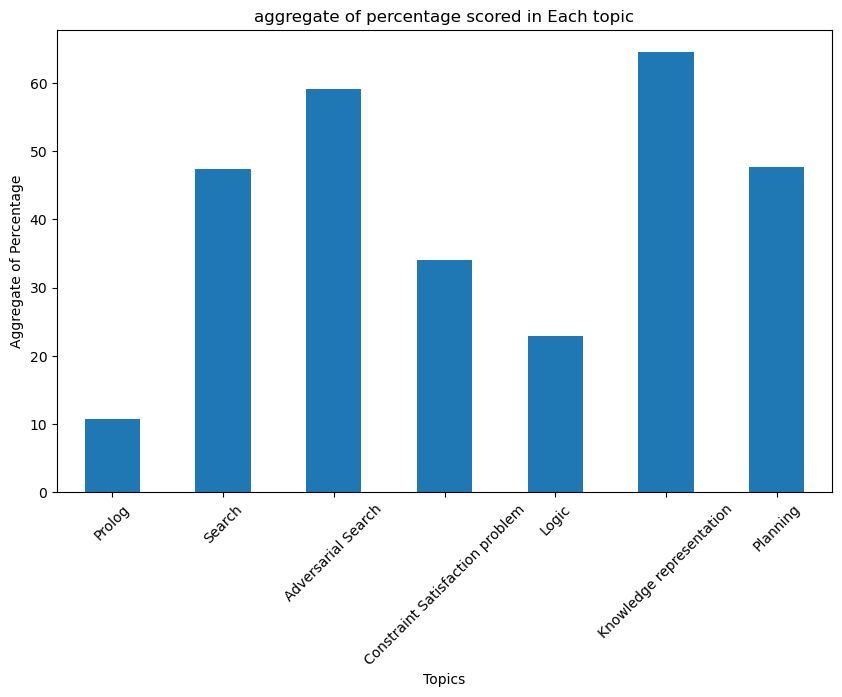

In [41]:
# 2.	Trying to understand the topics that has the maximum percentage scored and 
# the topics with minimum percentage scored:
# It can tell us which is the easiest topic according to students


# Calculate the sum of values in each column
column_agg = student_score_percentage_per_topic.mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
column_agg.plot(kind='bar')
plt.title('aggregate of percentage scored in Each topic')
plt.xlabel('Topics')
plt.ylabel('Aggregate of Percentage')
plt.xticks(rotation=45)
plt.show()


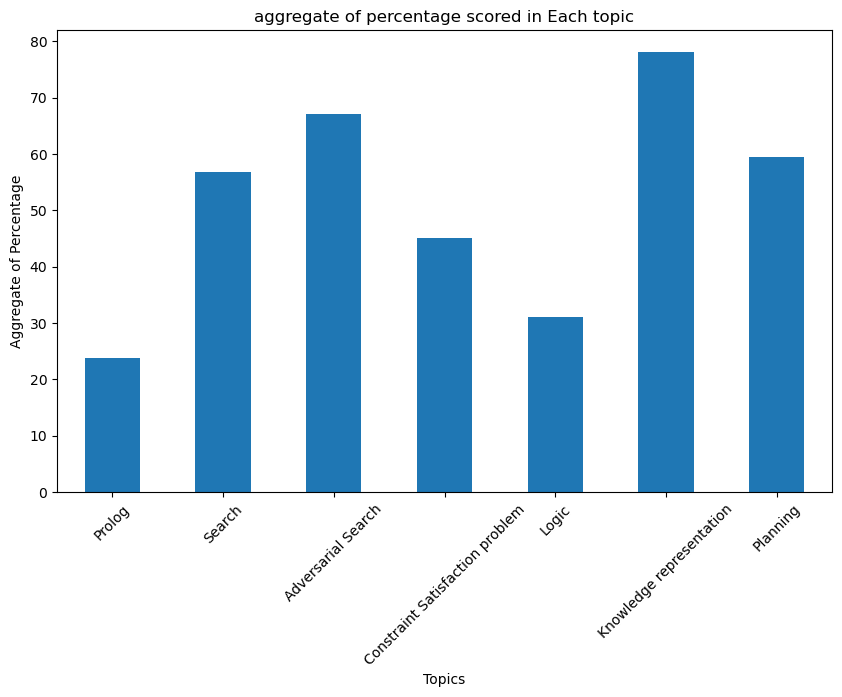

In [42]:

student_score_percentage_with_prolog_nonzero = student_score_percentage_per_topic[student_score_percentage_per_topic["Prolog"] > 0]
#student_score_percentage_per_topic.head()
student_score_percentage_with_prolog_nonzero.head()
# 2.	Trying to understand performance of students who were able to score marks in hardest topic

# Calculate the sum of values in each column
column_agg_prolog_nonzero = student_score_percentage_with_prolog_nonzero.mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
column_agg_prolog_nonzero.plot(kind='bar')
plt.title('aggregate of percentage scored in Each topic')
plt.xlabel('Topics')
plt.ylabel('Aggregate of Percentage')
plt.xticks(rotation=45)
plt.show()

In [43]:
student_score_percentage_with_prolog_nonzero.head()

,Prolog,Search,Adversarial Search,Constraint Satisfaction problem,Logic,Knowledge representation,Planning
0,18.75,28.947368,0.000000,35.714286,10.0,56.25,20.0
4,31.25,42.105263,83.333333,82.142857,20.0,87.50,75.0
5,12.50,44.736842,50.000000,14.285714,10.0,6.25,0.0
6,12.50,65.789474,83.333333,57.142857,35.0,100.00,90.0
12,12.50,31.578947,0.000000,14.285714,20.0,12.50,0.0


In [44]:
student_score_percentage_per_topic.head()

,Prolog,Search,Adversarial Search,Constraint Satisfaction problem,Logic,Knowledge representation,Planning
0,18.75,28.947368,0.000000,35.714286,10.0,56.25,20.0
1,0.00,10.526316,33.333333,3.571429,0.0,0.00,0.0
2,0.00,34.210526,66.666667,21.428571,25.0,62.50,35.0
3,0.00,47.368421,83.333333,50.000000,35.0,31.25,80.0
4,31.25,42.105263,83.333333,82.142857,20.0,87.50,75.0


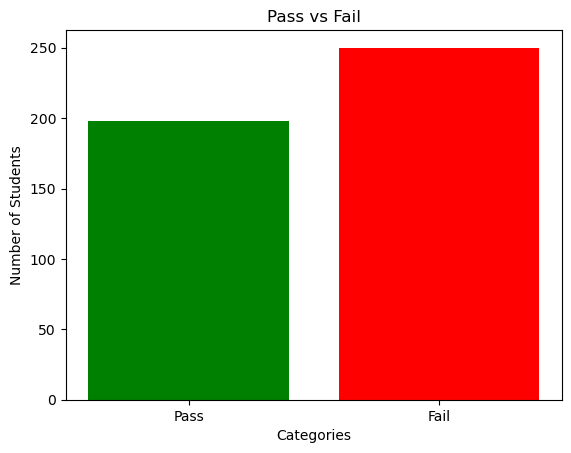

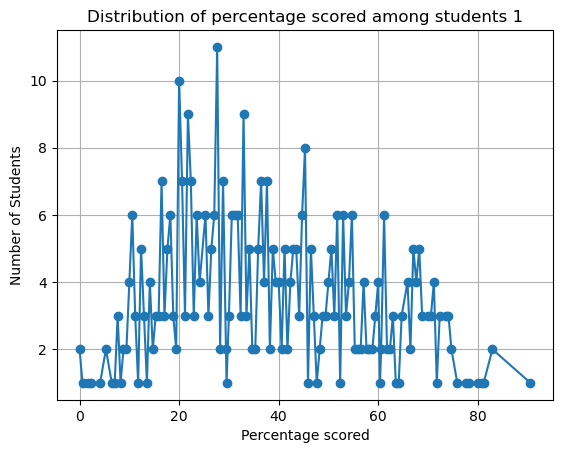

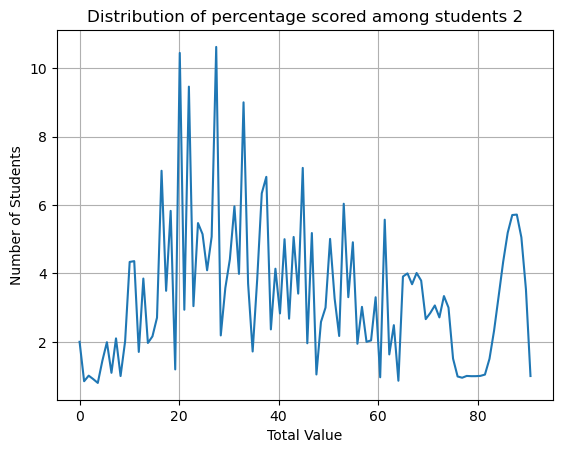

In [45]:
from scipy.interpolate import interp1d

# Defining parameters for the binomial distribution
column_values= student_score_per_topic_with_total["total_percentage"]

'''
n = len(column_values)  # Number of trials
p = 0.5  # Probability of success

# Generating a sample from a binomial distribution
binomial_sample = np.random.binomial(n, p, size=1000)

# Plotting the histogram of the binomial sample
plt.hist(binomial_sample, bins=range(min(binomial_sample), max(binomial_sample) + 1), density=True)
plt.title('Binomial Distribution of total marks scored by students ')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.show()
'''
pass_value = (column_values >= 40).sum()
fail_value = (column_values < 40).sum()

# Creating lists for plotting
categories = np.array(['Pass', 'Fail'])
values = np.array([pass_value, fail_value])

# Plotting the bar graph
plt.bar(categories, values, color=['green', 'red'])
plt.title('Pass vs Fail')
plt.xlabel('Categories')
plt.ylabel('Number of Students')
plt.show()

# Counting the occurrences of each total value
value_counts = column_values.value_counts().sort_index()

# Plotting the line graph
plt.plot(value_counts.index, value_counts.values, marker='o', linestyle='-')
plt.title('Distribution of percentage scored among students 1')
plt.xlabel('Percentage scored')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


# Performing spline interpolation
interpolator = interp1d(value_counts.index, value_counts.values, kind='cubic')

# Generating a range of x values for smooth plotting
x_smooth = np.linspace(value_counts.index.min(), value_counts.index.max(), 100)

# Plotting the smooth line graph
plt.plot(x_smooth, interpolator(x_smooth), '-')
plt.title('Distribution of percentage scored among students 2')
plt.xlabel('Total Value')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()



In [46]:
student_score_per_topic_with_total_with_prolog_nonzero = student_score_per_topic_with_total[student_score_per_topic_with_total["sums_1"] > 0]

student_score_per_topic_with_total_with_prolog_nonzero.head()


,sums_1,sums_2,sums_3,sums_4,sums_5,sums_6,sums_7,total,total_percentage
0,1.5,5.5,0.0,5.0,2.0,4.5,2.0,20.5,24.117647
4,2.5,8.0,5.0,11.5,4.0,7.0,7.5,45.5,53.529412
5,1.0,8.5,3.0,2.0,2.0,0.5,0.0,17.0,20.000000
6,1.0,12.5,5.0,8.0,7.0,8.0,9.0,50.5,59.411765
12,1.0,6.0,0.0,2.0,4.0,1.0,0.0,14.0,16.470588


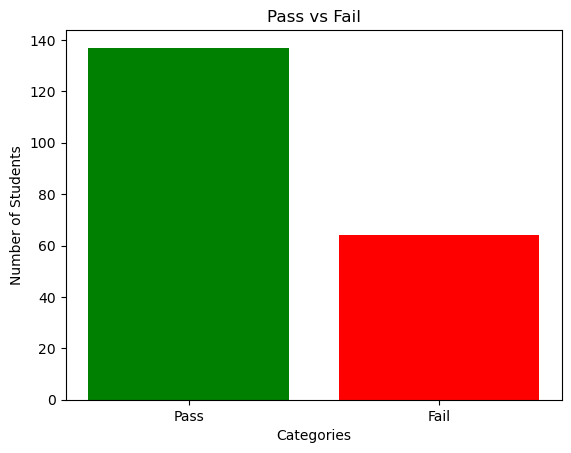

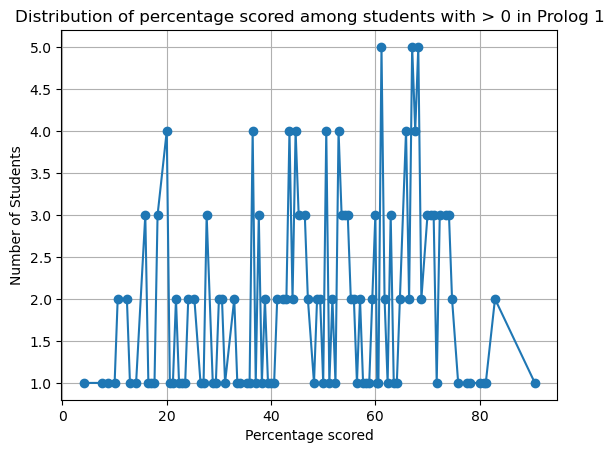

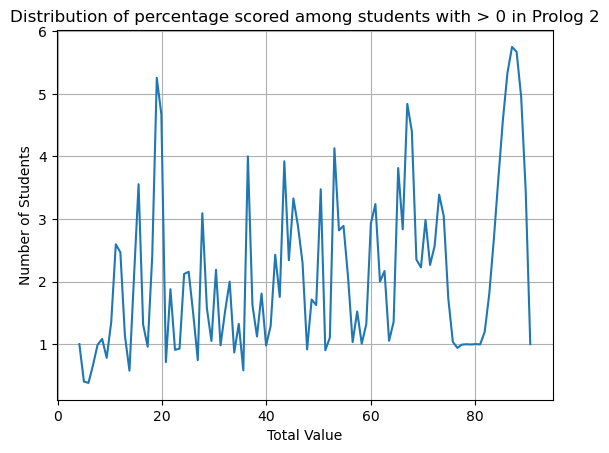

In [47]:
column_values= student_score_per_topic_with_total_with_prolog_nonzero["total_percentage"]
'''
n = len(column_values)  # Number of trials
p = 0.5  # Probability of success

# Generating a sample from a binomial distribution
binomial_sample = np.random.binomial(n, p, size=1000)

# Plotting the histogram of the binomial sample
plt.hist(binomial_sample, bins=range(min(binomial_sample), max(binomial_sample) + 1), density=True)
plt.title('Binomial Distribution of total marks scored by students ')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.show()
'''

pass_value = (column_values >= 40).sum()
fail_value = (column_values < 40).sum()

# Creating lists for plotting
categories = np.array(['Pass', 'Fail'])
values = np.array([pass_value, fail_value])

# Plotting the bar graph
plt.bar(categories, values, color=['green', 'red'])
plt.title('Pass vs Fail')
plt.xlabel('Categories')
plt.ylabel('Number of Students')
plt.show()

# Counting the occurrences of each total value
value_counts = column_values.value_counts().sort_index()

# Plotting the line graph
plt.plot(value_counts.index, value_counts.values, marker='o', linestyle='-')
plt.title('Distribution of percentage scored among students with > 0 in Prolog 1')
plt.xlabel('Percentage scored')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


# Performing spline interpolation
interpolator = interp1d(value_counts.index, value_counts.values, kind='cubic')

# Generating a range of x values for smooth plotting
x_smooth = np.linspace(value_counts.index.min(), value_counts.index.max(), 100)

# Plotting the smooth line graph
plt.plot(x_smooth, interpolator(x_smooth), '-')
plt.title('Distribution of percentage scored among students with > 0 in Prolog 2')
plt.xlabel('Total Value')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


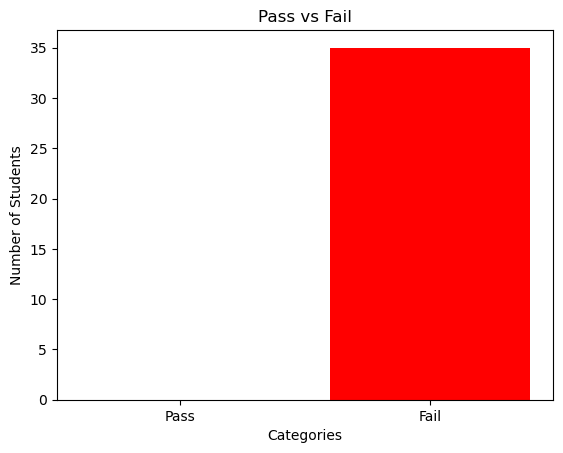

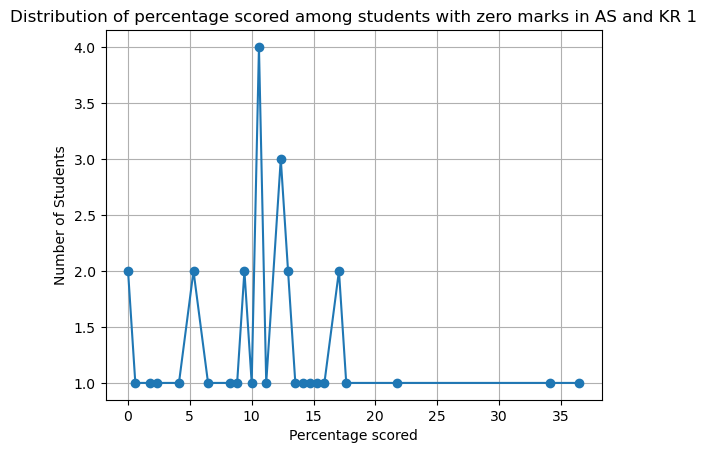

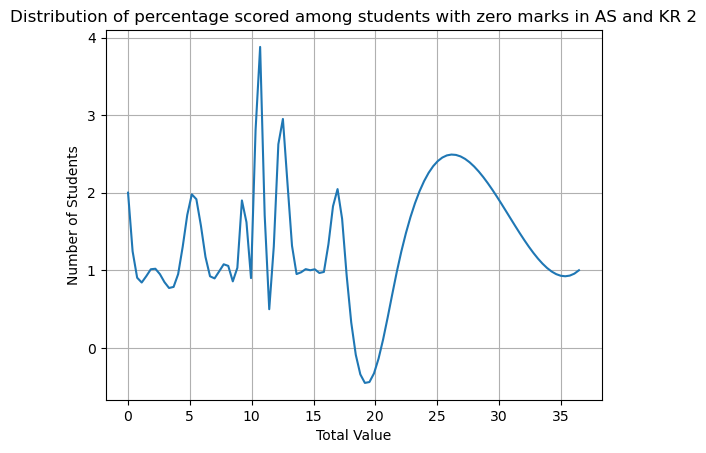

In [48]:
student_score_per_topic_with_total_with_AD_and_KR_zero = student_score_per_topic_with_total[(student_score_per_topic_with_total["sums_6"] == 0) ]

student_score_per_topic_with_total_with_AD_and_KR_zero.head()
column_values= student_score_per_topic_with_total_with_AD_and_KR_zero["total_percentage"]
'''
n = len(column_values)  # Number of trials
p = 0.5  # Probability of success

# Generating a sample from a binomial distribution
binomial_sample = np.random.binomial(n, p, size=1000)

# Plotting the histogram of the binomial sample
plt.hist(binomial_sample, bins=range(min(binomial_sample), max(binomial_sample) + 1), density=True)
plt.title('Binomial Distribution of total marks scored by students ')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.show()
'''

pass_value = (column_values >= 40).sum()
fail_value = (column_values < 40).sum()

# Creating lists for plotting
categories = np.array(['Pass', 'Fail'])
values = np.array([pass_value, fail_value])

# Plotting the bar graph
plt.bar(categories, values, color=['green', 'red'])
plt.title('Pass vs Fail')
plt.xlabel('Categories')
plt.ylabel('Number of Students')
plt.show()

# Counting the occurrences of each total value
value_counts = column_values.value_counts().sort_index()

# Plotting the line graph
plt.plot(value_counts.index, value_counts.values, marker='o', linestyle='-')
plt.title('Distribution of percentage scored among students with zero marks in AS and KR 1')
plt.xlabel('Percentage scored')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


# Performing spline interpolation
interpolator = interp1d(value_counts.index, value_counts.values, kind='cubic')

# Generating a range of x values for smooth plotting
x_smooth = np.linspace(value_counts.index.min(), value_counts.index.max(), 100)

# Plotting the smooth line graph
plt.plot(x_smooth, interpolator(x_smooth), '-')
plt.title('Distribution of percentage scored among students with zero marks in AS and KR 2')
plt.xlabel('Total Value')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


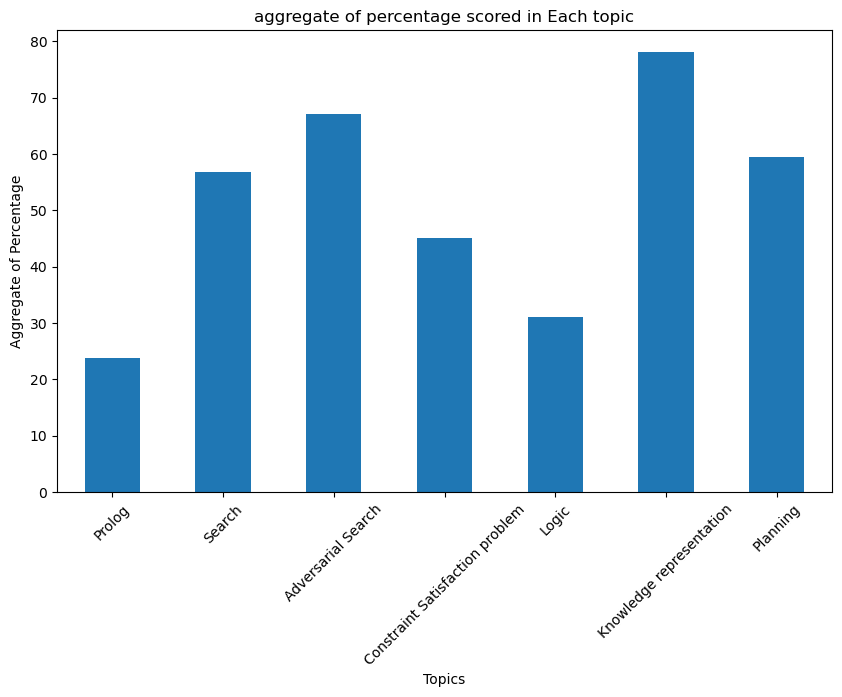

In [49]:
# 2.	Trying to understand performance of students who were not able to score marks in the easiest topics topic

student_score_percentage_with_with_AD_and_KR_zero = student_score_percentage_per_topic[(student_score_percentage_per_topic["Adversarial Search"] == 0) & (student_score_percentage_per_topic["Knowledge representation"] == 0)]
#student_score_percentage_per_topic.head()

# Calculate the sum of values in each column
column_agg_prolog_nonzero = student_score_percentage_with_prolog_nonzero.mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
column_agg_prolog_nonzero.plot(kind='bar')
plt.title('aggregate of percentage scored in Each topic')
plt.xlabel('Topics')
plt.ylabel('Aggregate of Percentage')
plt.xticks(rotation=45)
plt.show()